We'll be learning about the chi-squared test for categorical data. This test enables us to determine the statistical significance of observing a set of **categorical values**.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
income = pd.read_csv("income.csv")

Each row represents a single person who was counted in the 1990 US Census, and contains information about their income and demographics. Here are some of the relevant columns:

* `age` -- how old the person is
* `workclass` -- the type of sector the person is employed in.
* `race` -- the race of the person.
* `sex` -- the gender of the person, either Male or Female.

In [4]:
income.shape[0]

32561

The entire dataset has 32561 rows, and is a sample of the full Census. Of the rows, 10771 are Female, and 21790 are Male. These numbers look a bit off, because the full Census shows that the US is about 50% Male and 50% Female. So our expected values for number of Males and Females would be 16280.5 each.

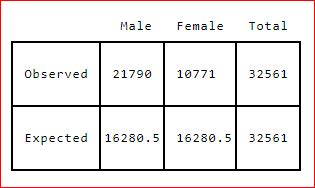

In [6]:
Image("Census.jpg")

We know that something looks off, but we don't quite know how to quantify how different the observed and expected values are. We also don't have any way to determine if there's a statistically significant difference between the two groups, and if we need to investigate further.

This is where a chi-squared test can help. The chi-squared test enables us to quantify the difference between sets of observed and expected categorical values.

One way that we can determine the differences between observed and expected values is to compute simple proportional differences.

Let's say an expected value is 1000, and the observed value is 1100. We can compute the proportional difference with

`(observed-expected)/expected (1100-1000)/1100 = 0.1`

So there's a `.1`, or `10%`, difference between our observed and expected values.

In [9]:
# proportional difference in number of observed Females vs number of expected Females
female_diff = (10771-16280.5)/16280.5

# proportional difference in number of observed Males vs number of expected Males.

male_diff = (21790-16280.5)/16280.5
female_diff + male_diff

0.0

We got `-0.338` for the Female difference, and `0.338` for the Male difference. These are great for finding individual differences for each category, but since both values add up to `0`, they don't give us a meaningful measure of how our overall observed counts deviate from the expected counts, because the total observed count for Male and Female items always comes out to `32561`. If the observed count of Females is high, the count of Males has to be low to compensate, and vice versa.

What we really want to find is one number that can tell us how much all of our observed counts deviate from all of their expected counterparts. This will let us figure out if our difference in counts is statistically significant. We can get one step closer to this by squaring the top term in our difference formula

Squaring the difference will ensure that all the differences don't sum to zero, giving us a non-zero number we can use to assess statistical significance.

We can calculate $X^2$, the chi-squared value, by adding up all of the squared differences between observed and expected values.

In [10]:
female_diff = (10771-16280.5)**2/16280.5
male_diff = (21790-16280.5)**2/16280.5

gender_chisq = female_diff + male_diff
gender_chisq

3728.950615767329

Now that we have a chi-squared value for our observed and expected gender counts, we need a way to figure out what the chi-squared value represents. We can translate a chi-squared value into a statistical significance value using a chi-squared sampling distribution. 

A **p-value** allows us to determine whether the difference between two values is due to chance (random chance), or due to an underlying difference.

We can generate a chi-squared sampling distribution using our expected probabilities. If we repeatedly generate random samples that contain 32561 samples, and graph the chi-squared value of each sample, we'll be able to generate a distribution.

By comparing our chi-squared value to the distribution, and seeing what percentage of the distribution is greater than our value, we'll get a **p-value**. For instance, if `5%` of the values in the distribution are greater than our chi-squared value, the p-value is `.05`.

In [86]:
chi_squared_values = []

for i in range(1000):
    sequence = np.random.rand(32561)   # or np.random.random(32561,)
    
    sequence[sequence< 0.5] = 0
    sequence[sequence>=0.5] = 1
    
    males_count = len(sequence[sequence== 0])
    female_count = len(sequence[sequence== 1])
    
    male_diff = (males_count - 16280.5)**2/16280.5
    female_diff = (female_count- 16280.5)**2/16280.5
    chi_squared  = male_diff + female_diff
    
    chi_squared_values.append(chi_squared)

print(len(chi_squared_values))

1000


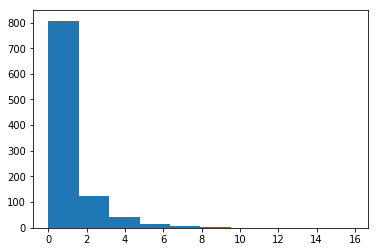

In [87]:
plt.hist(chi_squared_values)
plt.show()

Our calculated chi-squared value is greater than all the values in the distribution, so our **p-value** is `0`, indicating that our result is statistically significant. `.05` is the typical threshold for statistical significance, and anything below it is considered significant.

A significant value indicates that something is different between the observed and expected values, but it doesn't indicate what is different.

Now that we have a chi-squared sampling distribution, we can compare the chi-squared value we calculated for our data to it to see if our result is statistically significant. The chi-squared value we calculated was 3728.95. The highest value in the chi-squared sampling distribution was about 12. This means that our chi-squared value is higher than 100% of all the values in the sampling distribution, so we get a **p-value** of 0. This means that there is a `0%` chance that we could get such a result randomly.

This would indicate that we need to investigate our data collection techniques more closely to figure out why such a result occurred.

Because a chi-squared value has no sign (all chi-squared values are positive), it doesn't tell us anything about the direction of the statistical significance. If we had 10771 Females, and 21790 Males, or 10771 Males, and 21790 Females, we'd get the same chi-squared value. It's important to look at the data and see how the data is unbalanced after calculating a chi-squared value and getting a significant result.

One interesting thing about chi-squared values is that they get smaller as the sample size decreases. For example, with our Male and Female example, let's say we only have 100 rows, but the same observed and expected proportions:

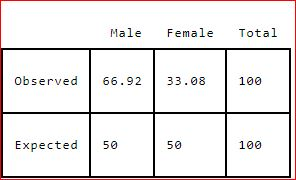

In [89]:
Image("Observation.jpg")

$(66.92-50)^2/50 + (30.08-50)^2/50 = 5.726 + 5.726 = 11.4522$

32561 (our original number of rows) divided by 100 (our new number of rows) is 325.61. If we multiply 11.4522 by 325.61, we get 3728.95, which is the exact same chi-squared value that we got above.

As sample sizes get larger, seeing large deviations from the expected probabilities gets less and less likely. For example, if we're flipping a coin 10 times, we wouldn't be surprised to see this:

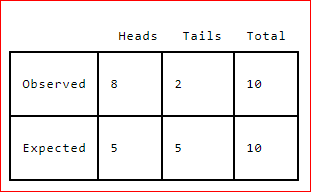

This is a fairly skewed result, but in a small sample size, random chance can create effects like this. It would be very surprising to see this after flipping a coin 1000 times, though

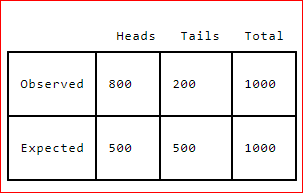

A result like this would probably make us check the coin to see if it's a trick coin or weighted improperly.

The chi-squared value follows the same principle. Chi-squared values increase as sample size increases, but the chance of getting a high chi-squared value decreases as the sample gets larger.

These two effects offset each other, and a chi-squared sampling distribution constructed when sampling 200 items for each iteration will look identical to one sampling 1000 items.

This enables us to easily compare any chi-squared value to a master sampling distribution to determine statistical significance, no matter what sample size the chi-squared value was created with.

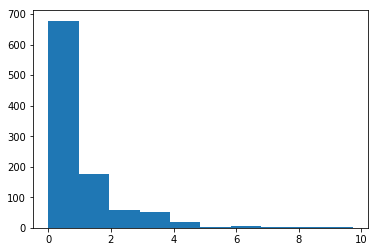

In [91]:
chi_squared_values = []

from numpy.random import random
import matplotlib.pyplot as plt

for i in range(1000):
    sequence = random(300)
    
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    
    male_diff = (male_count - 150) ** 2 / 150
    female_diff = (female_count - 150) ** 2 / 150
    
    chi_squared = male_diff + female_diff
    chi_squared_values.append(chi_squared)

plt.hist(chi_squared_values) 
plt.show()

When we were computing the chi-squared value earlier, we were working with 2 values that could vary, the number of Males and the number of Females. But actually, only 1 of the values could vary. Since we already know the total number of values, 32561, if we set one of the values, the other has to be the difference between 32561 and the value we set.

**A degree of freedom is the number of values that can vary without the other values being "locked in"**. In the case of our two categories, there is actually only one degree of freedom. Degrees of freedom are an important statistical concept that will come up repeatedly

So far, we've only calculated chi-squared values for 2 categories and 1 degree of freedom. We can actually work with any number of categories, and any number of degrees of freedom. We can accomplish this using largely the same formula we've been using, but we will need to generate new sampling distributions for each number of degrees of freedom.

If we look at the race column of the income data, the possible values are;

In [97]:
income["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

We can get our expected proportions straight from the full 1990 US Census:

* `White` -- 80.3%
* `Black` -- 12.1%
* `Asian-Pac-Islander` -- 2.9%
* `Amer-Indian-Eskimo` -- .8%
* `Other` -- 3.9%

In [98]:
income["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

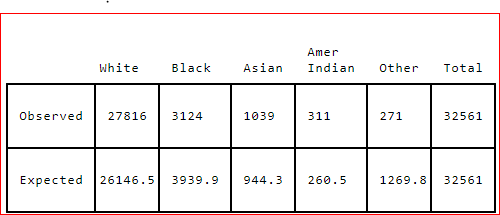

It looks like there's a discrepancy between the White and Other counts, but let's dig in a bit more and calculate the chi-squared value.

In [99]:
observed = [27816, 3124, 1039, 311, 271]
expected = [26146.5, 3939.9, 944.3, 260.5, 1269.8]

In [100]:
diffs = []

for i in range(len(observed)):
    diff = (observed[i] - expected[i])**2/expected[i]
    diffs.append(diff)
    
race_chisq = sum(diffs)
race_chisq

1080.485936593381

Rather than constructing another chi-squared sampling distribution for 4 degrees of freedom, we can use a function from the `SciPy` library to do it more quickly.

The `scipy.stats.chisquare` function takes in an array of observed frequences, and an array of expected frequencies, and returns a tuple containing both the **chi-squared value** and the matching **p-value** that we can use to check for statistical significance.

In [113]:
from scipy.stats import chisquare

chisquare_value, race_pvalue  = chisquare(observed, expected)
print(chisquare_value)
print(f"{race_pvalue}")

1080.485936593381
1.2848494674873035e-232
